In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
import math
import random
from matplotlib import colors as mcolors

### All of the data given by Weinmann we used to create the newest patient scenarios
Becaue no one in our group really knows how to create a json file in c++ I have hand copied out all the data into a second ipynb. I have strored the several lists inbetween the notebooks to acces them here.<br/>
##### To store data
```python
    %store myList
```
##### To retrieve data
```python
    %store -r myList
```

In [3]:
%store -r sinus_lead1
%store -r sinus_lead2
%store -r sinus_leadV1
%store -r sinus_leadV2
%store -r sinus_leadV3
%store -r sinus_leadV4
%store -r sinus_leadV5
%store -r sinus_leadV6
# kammerflimmern
%store -r vfvt_lead1
%store -r vfvt_lead2
# besondere art von herzinfarkt (myocard infarkt)
%store -r stemi_lead1
%store -r stemi_lead2
%store -r stemi_leadV1
%store -r stemi_leadV2
%store -r stemi_leadV3
%store -r stemi_leadV4
%store -r stemi_leadV5
%store -r stemi_leadV6
# tachy arithmya absoluta (herzrhythmusstörung)
%store -r taa_lead1
%store -r taa_lead2
%store -r taa_leadV1
%store -r taa_leadV2
%store -r taa_leadV3
%store -r taa_leadV4
%store -r taa_leadV5
%store -r taa_leadV6
# from data_processing (first weinmann data)
%store -r co2_data
%store -r paw_data
%store -r flow_data
%store -r thin_pleth
%store -r thin_hf
%store -r spo2AbsoluteInt
%store -r co2AbsoluteInt

##### Fast way of plotting some data to get a look at it

In [2]:
def plot(x):
    plt.plot(x)
    plt.show

##### Created some maps that have a specified structure

In [147]:
temp = [37.5,37.4,36.9,37.0,37.2]
nibd = [[120,80],[124,82],[119,75],[115,74],[126,90],[123,86],[121,79]]

In [157]:
standard_scenario = {
    'channel_list': [
        {
            'data': list(paw_data),
            'channel_information': {
                'enum_identifier': 'paw',
                'type': 'graph',
                'resolution': {
                    'value': 100,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mBar',
                },
            },    
        },
        {
            'data': list(flow_data),
            'channel_information': {
                'enum_identifier': 'flow',
                'type': 'graph',
                'resolution': {
                    'value': 100,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'l/min',
                },
            },    
        },
        {
            'data': list(co2_data),
            'channel_information': {
                'enum_identifier': 'co2',
                'type': 'graph',
                'resolution': {
                    'value': 100,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': thin_pleth,
            'channel_information': {
                'enum_identifier': 'pleth',
                'type': 'graph',
                'resolution': {
                    'value': 50,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'plt',
                },
            },    
        },
        {
            'data': thin_hf[0:817],
            'channel_information': {
                'enum_identifier': 'hfAbsolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'bpm',
                },
            },    
        },
        {
            'data': ecgCh1,
            'channel_information': {
                'enum_identifier': 'ecgCh1',
                'type': 'graph',
                'resolution': {
                    'value': 500,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mV',
                },
            },    
        },
        {
            'data': ecgCh2,
            'channel_information': {
                'enum_identifier': 'ecgCh2',
                'type': 'graph',
                'resolution': {
                    'value': 500,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mV',
                },
            },    
        },
        {
            'data': temp,
            'channel_information': {
                'enum_identifier': 'tempAbsolute',
                'type': 'absolute',
                'resolution': {
                    'value': 0.0056,
                    'resolutionUnit': 'Hz',
                    'dataUnit': '°C',
                },
            },    
        },
        {
            'data': nibd,
            'channel_information': {
                'enum_identifier': 'nibdAbsolute',
                'type': 'absolute',
                'resolution': {
                    'value': 0.008,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': spo2AbsoluteInt,
            'channel_information': {
                'enum_identifier': 'spo2Absolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': co2AbsoluteInt,
            'channel_information': {
                'enum_identifier': 'co2Absolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
    ],
    'scenario_information': {
        'duration': {
        'length': 817,
        'unit': 'seconds',
        },
    },
}

In [40]:
scenario_1 = {
    'channel_list': [
        {
            'data': thin_pleth[0:25000],
            'channel_information': {
                'enum_identifier': 'pleth',
                'type': 'graph',
                'resolution': {
                    'value': 50,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'plt',
                },
            },    
        },
        {
            'data': scenario1_hf,
            'channel_information': {
                'enum_identifier': 'hfAbsolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'bpm',
                },
            },    
        },
        {
            'data': ecgCh1,
            'channel_information': {
                'enum_identifier': 'ecgCh1',
                'type': 'graph',
                'resolution': {
                    'value': 1000,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mV',
                },
            },    
        },
        {
            'data': ecgCh2,
            'channel_information': {
                'enum_identifier': 'ecgCh2',
                'type': 'graph',
                'resolution': {
                    'value': 1000,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mV',
                },
            },    
        },
        {
            'data': scenario1_nibd,
            'channel_information': {
                'enum_identifier': 'nibdAbsolute',
                'type': 'absolute',
                'arraypos0': 'systolic',
                'arraypos1': 'diastolic',
                'resolution': {
                    'value': 0.008,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': scenario1_spo2,
            'channel_information': {
                'enum_identifier': 'spo2Absolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
    ],
    'scenario_information': {
        'duration': {
        'length': 500,
        'unit': 'seconds',
        },
    },
}

In [49]:
scenario2_hf = []
for element in scenario2_data['data'][0]['data']:
    scenario2_hf.append(int(element))

scenario2_spo2, scenario2_co2, nibd = [], [], []
for element in scenario2_data['data'][1]['data']:
    scenario2_spo2.append(int(element))
for element in scenario2_data['data'][2]['data']:
    scenario2_co2.append(int(element))
for element in scenario2_data['data'][3]['data']:
    nibd.append(element)

In [107]:
scenario_2 = {
    'channel_list': [
        {
            'data': co2_data[0:50000],
            'channel_information': {
                'enum_identifier': 'co2',
                'type': 'graph',
                'resolution': {
                    'value': 100,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': thin_pleth[0:25000],
            'channel_information': {
                'enum_identifier': 'pleth',
                'type': 'graph',
                'resolution': {
                    'value': 50,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'plt',
                },
            },    
        },
        {
            'data': scenario2_hf,
            'channel_information': {
                'enum_identifier': 'hfAbsolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'bpm',
                },
            },    
        },
        {
            'data': ecgCh1,
            'channel_information': {
                'enum_identifier': 'ecgCh1',
                'type': 'graph',
                'resolution': {
                    'value': 1000,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mV',
                },
            },    
        },
        {
            'data': ecgCh2,
            'channel_information': {
                'enum_identifier': 'ecgCh2',
                'type': 'graph',
                'resolution': {
                    'value': 1000,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mV',
                },
            },    
        },
        {
            'data': nibd,
            'channel_information': {
                'enum_identifier': 'nibdAbsolute',
                'type': 'absolute',
                'resolution': {
                    'value': 0.008,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': scenario2_spo2,
            'channel_information': {
                'enum_identifier': 'spo2Absolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': scenario2_co2,
            'channel_information': {
                'enum_identifier': 'co2Absolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
    ],
    'scenario_information': {
        'duration': {
        'length': 500,
        'unit': 'seconds',
        },
    },
}

In [16]:
scenario1_hf = []
for element in scenario1_data['data'][0]['data']:
    scenario1_hf.append(int(element))

scenario1_spo2 = []
for element in scenario1_data['data'][1]['data']:
    scenario1_spo2.append(int(element))

In [173]:
scenario_3_a = {
    'channel_list': [
        {
            'data': co2_data[0:50000],
            'channel_information': {
                'enum_identifier': 'co2',
                'type': 'graph',
                'resolution': {
                    'value': 100,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': thin_pleth[0:25000],
            'channel_information': {
                'enum_identifier': 'pleth',
                'type': 'graph',
                'resolution': {
                    'value': 50,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'plt',
                },
            },    
        },
        {
            'data': s3_a_hf,
            'channel_information': {
                'enum_identifier': 'hfAbsolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'bpm',
                },
            },    
        },
        {
            'data': cpr,
            'channel_information': {
                'enum_identifier': 'cpr',
                'type': 'graph',
                'resolution': {
                    'value': 2,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'cm',
                },
            },    
        },
        {
            'data': s3_a_ecg[0:250000],
            'channel_information': {
                'enum_identifier': 'ecgCh2',
                'type': 'graph',
                'resolution': {
                    'value': 500,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mV',
                },
            },    
        },
        {
            'data': s3_a_nibd,
            'channel_information': {
                'enum_identifier': 'nibdAbsolute',
                'type': 'absolute',
                'resolution': {
                    'value': 0.008,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': s3_a_spo2,
            'channel_information': {
                'enum_identifier': 'spo2Absolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': s3_a_co2,
            'channel_information': {
                'enum_identifier': 'co2Absolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
    ],
    'scenario_information': {
        'duration': {
        'length': 500,
        'unit': 'seconds',
        },
    },
}

In [20]:
scenario1_nibd = scenario1_data['data'][2]['data']

In [59]:
# Calculates the simple moving average
# We use this function for noise reduction in our data
def simple_moving_avg(data, n):
    averaged = []
    for i in range(len(data)):
        temp_value = 0
        for j in range(n):
            # no check for loopback when i-j < 0
            temp_value += data[i-j]
        averaged.append(1/n * temp_value)
    return averaged
     
# Example call for simple_moving_avg
# avg = simple_moving_avg(dictionarylist[5]["data"], 10)

In [57]:
co2_data = co2_data * 7.50062

In [60]:
co2_data = simple_moving_avg(co2_data, 10)

<function matplotlib.pyplot.show(close=None, block=None)>

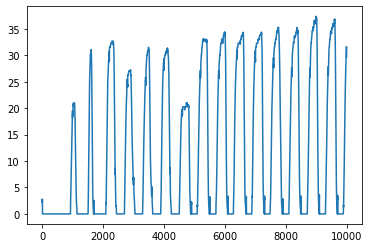

In [98]:
for k,v in enumerate(co2_data):
    if v < 1:
        co2_data[k] = 0
plt.plot(co2_data[0:10000])
plt.show

In [28]:
ecgCh1 = []
for i in range(2000):
    for element in sinus_lead1:
        ecgCh1.append(element/1000)

In [29]:
ecgCh2 = []
for i in range(2000):
    for element in sinus_lead2:
        ecgCh2.append(element/1000)

In [30]:
ecgCh1 = ecgCh1[0:500000]

In [34]:
len(ecgCh2)

500000

In [33]:
ecgCh2 = ecgCh2[0:500000]

<function matplotlib.pyplot.show(close=None, block=None)>

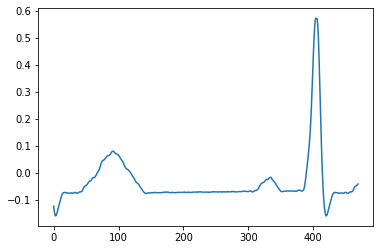

In [145]:
plt.plot(ecgCh1[10020:10490])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

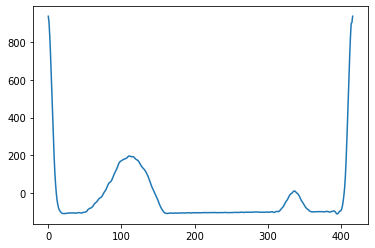

In [4]:
plt.plot(sinus_lead2)
plt.show

In [6]:
37*len(sinus_lead2)

15429

In [171]:
standard_scenario['channel_list'][0]['channel_information']['resolution']

{'value': 100, 'resolutionUnit': 'Hz', 'dataUnit': 'mBar'}

In [222]:
# read json
with open('scenario4_data.json') as f:
  scenario4_data = json.load(f)

In [242]:
# write to json
with open('scenario_4.json', 'w') as f:
    json.dump(scenario_4, f)

In [157]:
s3_a_hf, s3_a_spo2, s3_a_co2, s3_a_nibd = [], [], [], []
for i in scenario3_a_data['data'][0]['data']:
    s3_a_hf.append(int(i))
for i in scenario3_a_data['data'][1]['data']:
    s3_a_spo2.append(int(i))
for i in scenario3_a_data['data'][2]['data']:
    s3_a_co2.append(int(i))
for i in scenario3_a_data['data'][3]['data']:
    s3_a_nibd.append(i)

In [166]:
s3_a_ecg = []
for i in range(37):
    for element in sinus_lead2:
        s3_a_ecg.append(element/1000)
for i in range(75000):
    s3_a_ecg.append(0)
for i in range(37):
    for element in sinus_lead2:
        s3_a_ecg.append(element/1000)
for i in range(47):
    for element in vfvt_lead2:
        s3_a_ecg.append(element/1000)

In [169]:
len(s3_a_ecg[0:250000])

250000

<function matplotlib.pyplot.show(close=None, block=None)>

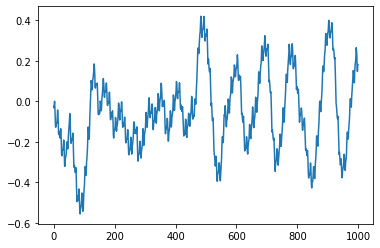

In [172]:
plt.plot(s3_a_ecg[150000:151000])
plt.show

In [207]:
len(vfvt_lead1)

3082

In [147]:
cpr = []
for i in range(1000):
    cpr.append(random.uniform(4.5,6.5))
colors = []
for i in cpr:
    if 5 <= i <= 6 :
        colors.append('#34C759')
    else:
        colors.append('#FF3B30')

<BarContainer object of 1000 artists>

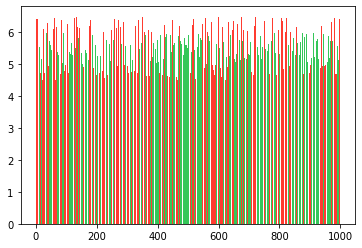

In [148]:
x=range(len(cpr))
y=cpr
plt.figure()
plt.bar(x,y,color=colors)

In [131]:
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

In [134]:
colors['lime']

'#00FF00'

In [205]:
scenario_3_b = {
    'channel_list': [
        {
            'data': co2_data[0:50000],
            'channel_information': {
                'enum_identifier': 'co2',
                'type': 'graph',
                'resolution': {
                    'value': 100,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': thin_pleth[0:25000],
            'channel_information': {
                'enum_identifier': 'pleth',
                'type': 'graph',
                'resolution': {
                    'value': 50,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'plt',
                },
            },    
        },
        {
            'data': s3b_hf,
            'channel_information': {
                'enum_identifier': 'hfAbsolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'bpm',
                },
            },    
        },
        {
            'data': ecgCh2,
            'channel_information': {
                'enum_identifier': 'ecgCh2',
                'type': 'graph',
                'resolution': {
                    'value': 1000,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mV',
                },
            },    
        },
        {
            'data': s3b_nibd,
            'channel_information': {
                'enum_identifier': 'nibdAbsolute',
                'type': 'absolute',
                'resolution': {
                    'value': 0.008,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': s3b_spo2,
            'channel_information': {
                'enum_identifier': 'spo2Absolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': s3b_co2,
            'channel_information': {
                'enum_identifier': 'co2Absolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
    ],
    'scenario_information': {
        'duration': {
        'length': 500,
        'unit': 'seconds',
        },
    },
}

In [187]:
s3b_hf, s3b_spo2, s3b_co2, s3b_nibd = [], [], [], []
for i in scenario3_b_data['data'][0]['data']:
    s3b_hf.append(int(i))
for i in scenario3_b_data['data'][1]['data']:
    s3b_spo2.append(int(i))
for i in scenario3_b_data['data'][2]['data']:
    s3b_co2.append(int(i))
for i in scenario3_b_data['data'][3]['data']:
    s3b_nibd.append(i)

In [208]:
s3c_ecg = []
for j in range(82):
    for i in vfvt_lead1:
        s3c_ecg.append(i)

In [209]:
len(s3c_ecg)

252724

In [210]:
len(ecgCh2[0:250000])

250000

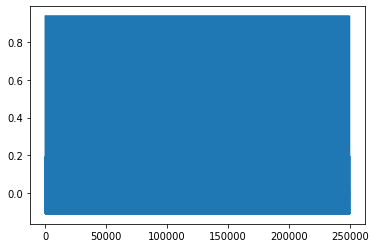

In [194]:
plot(ecgCh2[0:250000])

In [200]:
s3c_hf, s3c_spo2, s3c_co2, s3c_nibd = [], [], [], []
for i in scenario3_c_data['data'][0]['data']:
    s3c_hf.append(int(i))
for i in scenario3_c_data['data'][1]['data']:
    s3c_spo2.append(int(i))
for i in scenario3_c_data['data'][2]['data']:
    s3c_co2.append(int(i))
for i in scenario3_c_data['data'][3]['data']:
    s3c_nibd.append(i)

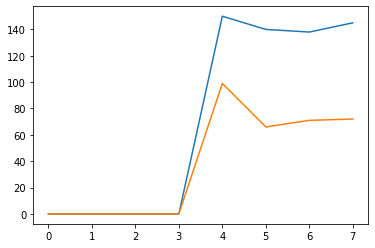

In [204]:
plot(s3c_nibd)

In [219]:
scenario_3_c = {
    'channel_list': [
        {
            'data': co2_data[0:50000],
            'channel_information': {
                'enum_identifier': 'co2',
                'type': 'graph',
                'resolution': {
                    'value': 100,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': thin_pleth[0:25000],
            'channel_information': {
                'enum_identifier': 'pleth',
                'type': 'graph',
                'resolution': {
                    'value': 50,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'plt',
                },
            },    
        },
        {
            'data': s3c_hf,
            'channel_information': {
                'enum_identifier': 'hfAbsolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'bpm',
                },
            },    
        },
        {
            'data': ecgCh2[0:250000],
            'channel_information': {
                'enum_identifier': 'ecgCh2',
                'type': 'graph',
                'resolution': {
                    'value': 500,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mV',
                },
            },    
        },
        {
            'data': s3c_nibd,
            'channel_information': {
                'enum_identifier': 'nibdAbsolute',
                'type': 'absolute',
                'resolution': {
                    'value': 0.008,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': s3c_spo2,
            'channel_information': {
                'enum_identifier': 'spo2Absolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': s3c_co2,
            'channel_information': {
                'enum_identifier': 'co2Absolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': cpr_s3c,
            'channel_information': {
                'enum_identifier': 'cpr',
                'type': 'graph',
                'resolution': {
                    'value': 2,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'cm',
                },
            },    
        },
    ],
    'scenario_information': {
        'duration': {
        'length': 500,
        'unit': 'seconds',
        },
    },
}

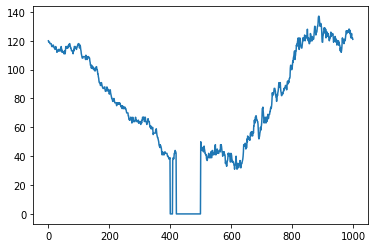

In [211]:
plot(s3c_hf)

In [217]:
cpr_s3c = []
for i in range(400):
    cpr_s3c.append(0)
for i in range(600):
    cpr_s3c.append(random.uniform(4.5,6.5))
colors = []
for i in cpr_s3c:
    if 5 <= i <= 6 :
        colors.append('#34C759')
    else:
        colors.append('#FF3B30')

In [218]:
len(cpr_s3c)

1000

In [241]:
scenario_4 = {
    'channel_list': [
        {
            'data': co2_data[0:50000],
            'channel_information': {
                'enum_identifier': 'co2',
                'type': 'graph',
                'resolution': {
                    'value': 100,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': thin_pleth[0:25000],
            'channel_information': {
                'enum_identifier': 'pleth',
                'type': 'graph',
                'resolution': {
                    'value': 50,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'plt',
                },
            },    
        },
        {
            'data': s4_hf,
            'channel_information': {
                'enum_identifier': 'hfAbsolute',
                'type': 'absolute',
                'resolution': {
                    'value': 2,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'bpm',
                },
            },    
        },
        {
            'data': ecgCh2[0:250000],
            'channel_information': {
                'enum_identifier': 'ecgCh2',
                'type': 'graph',
                'resolution': {
                    'value': 500,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mV',
                },
            },    
        },
        {
            'data': s4_nibd,
            'channel_information': {
                'enum_identifier': 'nibdAbsolute',
                'type': 'absolute',
                'resolution': {
                    'value': 0.008,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': s4_spo2,
            'channel_information': {
                'enum_identifier': 'spo2Absolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': s4_co2,
            'channel_information': {
                'enum_identifier': 'co2Absolute',
                'type': 'absolute',
                'resolution': {
                    'value': 1,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'mmHg',
                },
            },    
        },
        {
            'data': cpr_s3c,
            'channel_information': {
                'enum_identifier': 'cpr',
                'type': 'graph',
                'resolution': {
                    'value': 2,
                    'resolutionUnit': 'Hz',
                    'dataUnit': 'cm',
                },
            },    
        },
    ],
    'scenario_information': {
        'duration': {
        'length': 500,
        'unit': 'seconds',
        },
    },
}

In [232]:
s4_hf, s4_spo2, s4_co2, s4_nibd = [], [], [], []
for i in scenario4_data['data'][0]['data']:
    s4_hf.append(int(i))
for i in scenario4_data['data'][1]['data']:
    s4_spo2.append(int(i))
for i in scenario4_data['data'][2]['data']:
    s4_co2.append(int(i))
for i in scenario4_data['data'][3]['data']:
    s4_nibd.append(i)

In [240]:
len(s4_nibd)

4

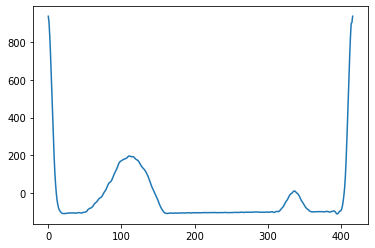

In [7]:
plot(sinus_lead2)